# ePPR - extended Projection Pursuit Regression
# $$\hat{y}_i=\bar{y}+\sum_{d=0}^D\sum_{m=1}^{M_d}\beta_{m,d}\phi_{m,d}(\alpha_{m,d}^Tx_{i-d})$$
# with    $\frac{1}{n}\sum_{i=1}^n\phi_{m,d}(\alpha_{m,d}^Tx_{i-d})=0$,    $\frac{1}{n}\sum_{i=1}^n\phi_{m,d}^2(\alpha_{m,d}^Tx_{i-d})=1$
# by minimizing    $f=\sum_{i=1}^n(y_i-\hat{y}(x_i))^2+\lambda\sum_{d=0}^D\sum_{m=1}^{M_d}\Vert{L\alpha_{m,d}}\Vert^2$
___
### References
Rapela, J., Felsen, G., Touryan, J., Mendel, J. M. & Grzywacz, N. M. ePPR: a new strategy for the characterization of sensory cells from input/output data. Network: Computation in Neural Systems 21, 35–90 (2010).

Friedman J, Stuetzle W. Projection pursuit regression. Journal of the American Statistical
Association 76(376):817–823 (1981).
___

## Test Data
#### X: Natural Images
#### Y: Simulated Neuron with MFR=0.56, MIF=4.26

In [2]:
using FileIO
d=load("./data.jld");x=d["x"];y=d["y"];

Interact.Slider{Int64}(7: "input-2" = 12000 Int64 , "", 12000, 1:24000, "horizontal", true, "d", true)

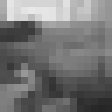

"y = 5"

In [4]:
using Images,Interact
i = slider(1:size(x,1))
xvalue = map(j->colorview(Gray,reshape(x[j,:]/135,16,16)),signal(i))
yvalue = map(j->"y = $(y[j])",signal(i))
display.([i,xvalue,yvalue]);

## ePPR Hyper Parameters and Debug Options

In [6]:
using ePPR
hp=ePPRHyperParams(16,ndelay=3)
hp.lambda = 15
hp.nft = [6]
debug = ePPRDebugOptions(DebugVisual);

## ePPR

In [7]:
model,models = epprcv(x,y,hp,debug);

Cross Validation Data Partition, n = 24000, ntrain = 21600 in 5-fold, ntrainfold = 4320 in 8-fold, ntest = 2400 in 8-fold
ePPR Forward Stepwise ...
Fit [Temporal-0, Spatial-1] New Term ...
Get Initial α ...
New Term 1th iteration. TermLoss: 10849.986968410203, PenaltyLoss: 156.36591022562567.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.2691134286621535
                                 step is easy
New Term 2th iteration. TermLoss: 9965.68467839645, PenaltyLoss: 133.31692282611584.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.7067650240555896
                                 step is λ = 0
New Term 3th iteration. TermLoss: 9025.04306966284, PenaltyLoss: 171.86060080755362.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.4726630007319916
                                 step is λ = 0
New Term 4th iteration. TermLoss: 8388.887469841544, PenaltyLoss: 197.76949837484437.
NewtonTrustRegion 1

NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.7284328214590645
                                 step is λ = 0
New Term 4th iteration. TermLoss: 6117.5889259405785, PenaltyLoss: 42.2696993996272.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.7904902223534692
                                 step is λ = 0
New Term converged in 4 iterations with (lossₒ-lossₙ)/lossₒ = 7.750107875392504e-5.
Refit [Temporal-0, Spatial-3] New Term ...
New Term 1th iteration. TermLoss: 6112.886412956789, PenaltyLoss: 122.41229547697073.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9509519902524811
                                 step is λ = 0
New Term 2th iteration. TermLoss: 6073.066751617538, PenaltyLoss: 134.06295392536296.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9298995007732327
                                 step is λ = 0
New Term 3th iteration. TermLoss: 6072.9

NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = -0.12904395870493118
                                 step is λ = 0
NewtonTrustRegion 2th iteration, r = 0.25
                                 ρ = -0.04468069196647655
                                 step is easy
NewtonTrustRegion 3th iteration, r = 0.0625
                                 ρ = 0.5920917782927559
                                 step is easy
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 0.0004946998615056275.
ePPR Backward Stepwise ...


LoadError: [91mMethodError: any(::Base.##136#137{Bool}, ::Array{Any,1}) is ambiguous. Candidates:
  any(f, A::AbstractArray{#s3,N} where N where #s3>:Nulls.Null) in Nulls at C:\Users\fff00\.julia\v0.6\Nulls\src\Nulls.jl:208
  any(f, A::AbstractArray{#s16,N} where N where #s16>:Missings.Missing) in Missings at C:\Users\fff00\.julia\v0.6\Missings\src\Missings.jl:177
Possible fix, define
  any(::Any, ::AbstractArray{#s16,N} where N where #s16>:Union{Missings.Missing, Nulls.Null})[39m

### Final Model

In [6]:
display.([plotalpha(model,hp),plotphi(model)]);

## Benchmark

In [7]:
using BenchmarkTools
@btime model,models = epprcv(x,y,hp);

INFO: Recompiling stale cache file C:\Users\fff00\.julia\lib\v0.6\BenchmarkTools.ji for module BenchmarkTools.


  464.181 s (5924250 allocations: 32.79 GiB)
